In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Copper_Set.csv')
df.head()

C:\Users\Vignesh Rao\AppData\Local\Temp\ipykernel_35240\4027234890.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Copper_Set.csv')


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [71]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [72]:
print(len(df['id'].unique()))
print(len(df['item_date'].unique())) 
print(len(df['quantity tons'].unique()))
print(len(df['customer'].unique())) 
print(len(df['country'].unique()))
print(len(df['status'].unique()))
print(len(df['item type'].unique()))
print(len(df['application'].unique()))
print(len(df['thickness'].unique()))
print(len(df['width'].unique()))
print(len(df['material_ref'].unique()))
print(len(df['product_ref'].unique())) 
print(len(df['delivery date'].unique())) 
print(len(df['selling_price'].unique()))

181672
253
181673
1170
18
10
7
31
595
1386
16564
33
29
9796


In [73]:
missing_count = df.isnull().sum()
missing_count

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [74]:
#Changing the suitable Numerical/Proper Data format
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [75]:
#After changing the format view the missing data count
missing_count = df.isnull().sum()
missing_count

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [76]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


In [77]:
#Replacing the Missing Values of "material_ref" column first which has highest null values...
#Other Column null values are lesser even after deleting it has no effect on Dataset.
df['material_ref'].fillna('unknown', inplace=True)
#Delete other null values 
df = df.dropna()

In [78]:
#Now check on the NULL values
missing_count = df.isnull().sum()
print(missing_count)

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64


In [79]:
df.shape

(181631, 14)

In [80]:
#Dataframe copy for further proceeding with Skewness Process
df_copy = df.copy()

In [81]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181631 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181631 non-null  object 
 1   item_date      181631 non-null  object 
 2   quantity tons  181631 non-null  float64
 3   customer       181631 non-null  float64
 4   country        181631 non-null  float64
 5   status         181631 non-null  object 
 6   item type      181631 non-null  object 
 7   application    181631 non-null  float64
 8   thickness      181631 non-null  float64
 9   width          181631 non-null  float64
 10  material_ref   181631 non-null  object 
 11  product_ref    181631 non-null  int64  
 12  delivery date  181631 non-null  object 
 13  selling_price  181631 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


C:\Users\Vignesh Rao\AppData\Local\Temp\ipykernel_35240\996241204.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy['quantity tons'])
c:\Users\Vignesh Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vignesh Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf val

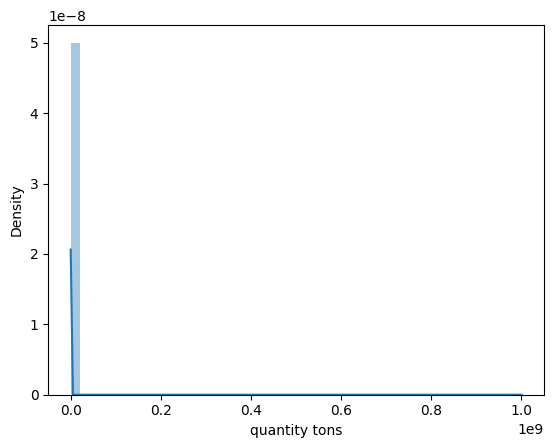

C:\Users\Vignesh Rao\AppData\Local\Temp\ipykernel_35240\996241204.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy['country'])
c:\Users\Vignesh Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vignesh Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to

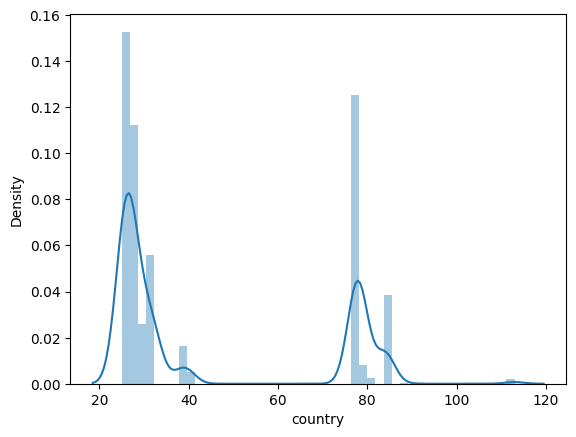

C:\Users\Vignesh Rao\AppData\Local\Temp\ipykernel_35240\996241204.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy['application'])
c:\Users\Vignesh Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vignesh Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf value

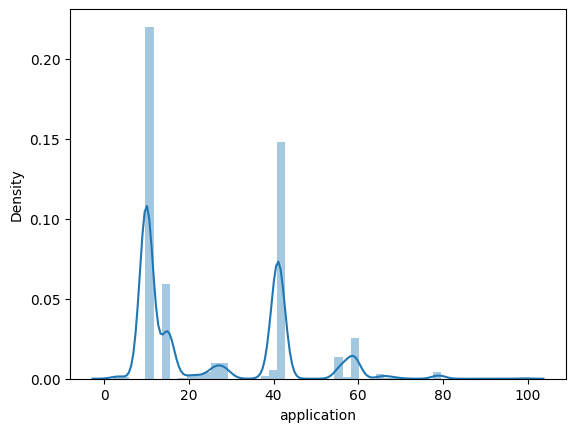

C:\Users\Vignesh Rao\AppData\Local\Temp\ipykernel_35240\996241204.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy['thickness'])
c:\Users\Vignesh Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vignesh Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values 

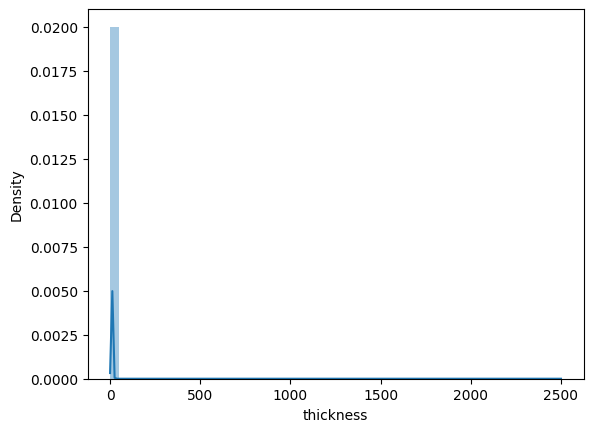

C:\Users\Vignesh Rao\AppData\Local\Temp\ipykernel_35240\996241204.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy['width'])
c:\Users\Vignesh Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vignesh Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to N

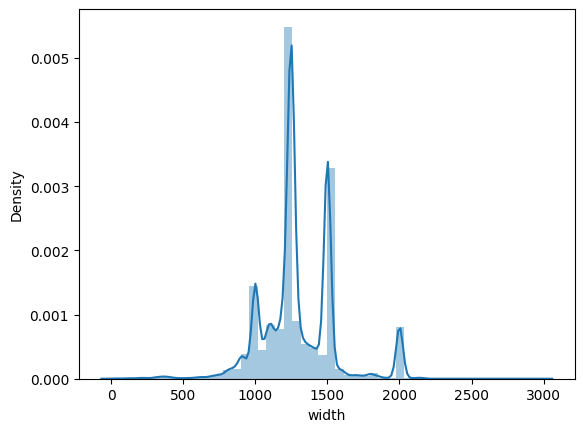

C:\Users\Vignesh Rao\AppData\Local\Temp\ipykernel_35240\996241204.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy['selling_price'])
c:\Users\Vignesh Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vignesh Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf val

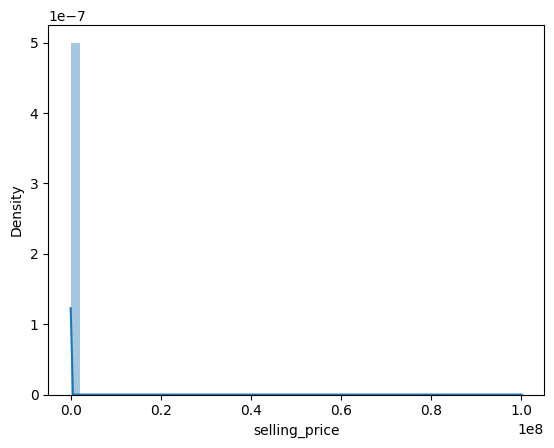

In [82]:
#To predict a model the data must be distributed asymmetrically
#To check if there are skewness we use Visualization - Plot.
df_copy['quantity tons']  
df_copy['country']
df_copy['application']
df_copy['thickness']       
df_copy['width']           
df_copy['selling_price']   

import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df_copy['quantity tons'])
plt.show()
sns.distplot(df_copy['country'])
plt.show()
sns.distplot(df_copy['application'])
plt.show()
sns.distplot(df_copy['thickness'])
plt.show()
sns.distplot(df_copy['width'])
plt.show()
sns.distplot(df_copy['selling_price'])
plt.show()

In [83]:
#We have Skewness in quantity_tons, thickness and selling_price columns
skew = df_copy['quantity tons'] <= 0
print(skew.sum())
df_copy.loc[skew, 'quantity tons'] = np.nan

skew = df_copy['thickness'] <= 0
print(skew.sum())

skew = df_copy['selling_price'] <= 0
print(skew.sum())
df_copy.loc[skew, 'selling_price'] = np.nan

4
0
7


In [84]:
df_copy.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [85]:
df_copy.dropna(inplace=True)
len(df_copy)

181620

C:\Users\Vignesh Rao\AppData\Local\Temp\ipykernel_35240\3994388082.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy['quantity tons_log'])
c:\Users\Vignesh Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vignesh Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf

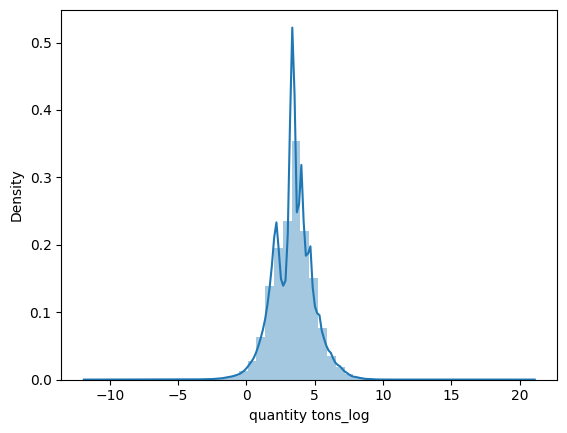

C:\Users\Vignesh Rao\AppData\Local\Temp\ipykernel_35240\3994388082.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy['thickness_log'])
c:\Users\Vignesh Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vignesh Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf val

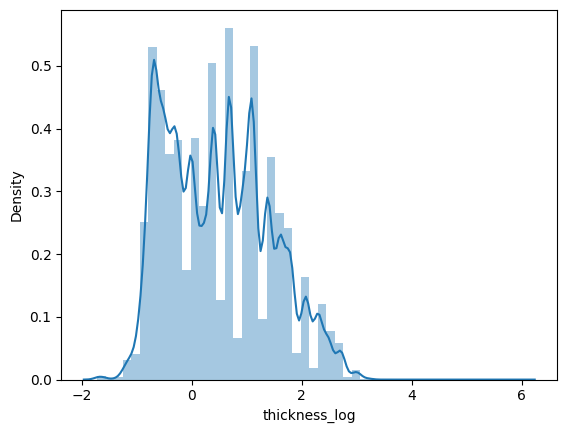

c:\Users\Vignesh Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vignesh Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


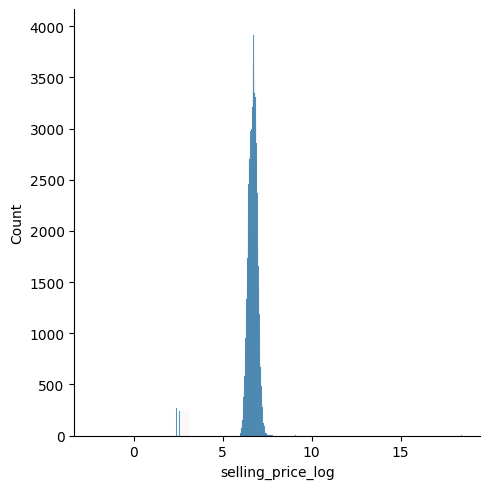

In [86]:
df_copy['quantity tons_log'] = np.log(df_copy['quantity tons'])
sns.distplot(df_copy['quantity tons_log'])
plt.show()

df_copy['thickness_log'] = np.log(df_copy['thickness'])
sns.distplot(df_copy['thickness_log'])
plt.show()

df_copy['selling_price_log'] = np.log(df_copy['selling_price'])
sns.displot(df_copy['selling_price_log'])
plt.show()

In [87]:
df_copy.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842


In [88]:
x1=df_copy[['quantity tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()


<Axes: >

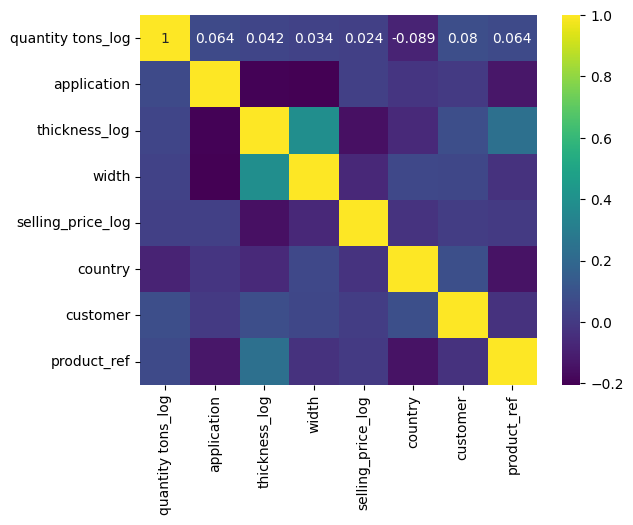

In [89]:
sns.heatmap(x1, annot=True, cmap="viridis")

In [90]:
#Need to build Regression and Classification Model
#Note: dataset contains more noise and linearity between independent variables so itll perform well only with tree based models
#1.Regression model: Decision Tree Regressor
from sklearn.model_selection import train_test_split #To split Training and Testing data
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

#In Regression Model we need to find the Selling Price 
X = df_copy[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y = df_copy['selling_price_log']

#There are categorical data so chaninging it using OneHotEncoder
one_hot = OneHotEncoder(handle_unknown='ignore')
one_hot.fit(X[['item type']])
X_one_hot = one_hot.fit_transform(X[['item type']]).toarray()
one_hot_encode = OneHotEncoder(handle_unknown='ignore')
one_hot_encode.fit(X[['status']])
X_one_hot_encode = one_hot_encode.fit_transform(X[['status']]).toarray()

X = np.concatenate((X[['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_one_hot, X_one_hot_encode), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Splitting Data into Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

d_t_r = DecisionTreeRegressor()

parameter_grid_value = {'max_depth': [2, 5, 10, 20],
                   'min_samples_split': [2, 5, 10],
                   'min_samples_leaf': [1, 2, 4],
                   'max_features': ['auto', 'sqrt', 'log2']}

grid_search_cv = GridSearchCV(estimator=d_t_r, param_grid=parameter_grid_value, cv=5)
grid_search_cv.fit(X_train, y_train)

best_parameters = grid_search_cv.best_params_
print("Best HyperParameters:", best_parameters)
crt_model = grid_search_cv.best_estimator_
#Predicting on Test Set
y_predicted_values = crt_model.predict(X_test)

#Evaluating
mse = mean_squared_error(y_test, y_predicted_values)
r2 = r2_score(y_test, y_predicted_values)
print('Mean Square Error is : ', mse)
print('R-square value is : ', r2)

c:\Users\Vignesh Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Vignesh Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Vignesh Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Vignesh Rao\AppData\Local\Programs\Python\Python310\lib\si

Best HyperParameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean Square Error is :  0.02871327583826926
R-square value is :  0.9108756700680707


In [91]:
#Predicting Regression
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = one_hot.transform(new_sample[:, [7]]).toarray()
new_sample_be = one_hot_encode.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = crt_model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [659.96818105]


c:\Users\Vignesh Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\Vignesh Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [92]:
import pickle
with open(r'model.pkl', 'wb') as file:
    pickle.dump(crt_model, file)
with open(r'scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open(r't.pkl', 'wb') as f:
    pickle.dump(one_hot, f)
with open(r's.pkl', 'wb') as f:
    pickle.dump(one_hot_encode, f)


In [93]:
print(len(df_copy))
df_copy.head(3)

181620


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211


In [94]:
df_copy = df_copy[df_copy['status'].isin(['Won', 'Lost'])]
len(df_copy)

150427

In [95]:
#2. Classification Model - Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer

Y = df_copy['status']
X= df_copy[['quantity tons_log','selling_price_log','item type','application','thickness_log','width','country','customer','product_ref']]

one_hot = OneHotEncoder(handle_unknown='ignore')
one_hot.fit(X[['item type']])
X_one_hot_encode = one_hot.fit_transform(X[['item type']]).toarray()

be = LabelBinarizer()
be.fit(Y)
y = be.fit_transform(Y)
#Independent features after encoding...
X = np.concatenate((X[['quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_one_hot_encode), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

# Decision Tree Classifier
d_t_c = DecisionTreeClassifier()
d_t_c.fit(X_train, y_train)
# Predicting on Test Data
predicted_values = d_t_c.predict(X_test)

accuracy = accuracy_score(y_test, predicted_values)
print("Accuracy: ", accuracy)
cm = confusion_matrix(y_test, predicted_values)
print('Confusion Matrix:\n', cm)

Accuracy:  0.9103902147178089
Confusion Matrix:
 [[ 5666  1336]
 [ 1360 21724]]


In [96]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

print("Confusion Matrix:")
print(confusion_matrix(y_test, predicted_values))

print("Classification Report:")
print(classification_report(y_test, predicted_values))

Confusion Matrix:
[[ 5666  1336]
 [ 1360 21724]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      7002
           1       0.94      0.94      0.94     23084

    accuracy                           0.91     30086
   macro avg       0.87      0.88      0.87     30086
weighted avg       0.91      0.91      0.91     30086



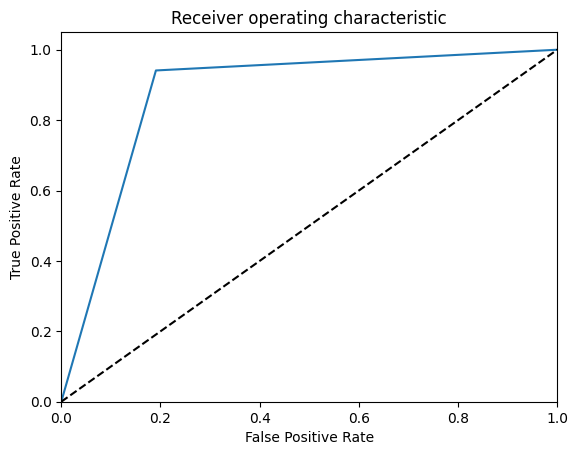

In [97]:
#AUC...
fpr, tpr, thresholds = roc_curve(y_test, predicted_values)
roc_auc = auc(fpr, tpr)

plt.title('Receiver operating characteristic')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()




In [98]:
#Predicting with New Sample...
new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
new_sample_ohe = one_hot.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = d_t_c.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


c:\Users\Vignesh Rao\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [99]:
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(d_t_c, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(one_hot, f)

In [100]:
print("Regression Model Data Shapes:")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Regression Model Data Shapes:
(120341, 15) (30086, 15) (120341, 1) (30086, 1)


In [101]:
print("Classification Model Data Shapes:")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Classification Model Data Shapes:
(120341, 15) (30086, 15) (120341, 1) (30086, 1)
